Welkom bij deze tutorial over het manipuleren van 2D-data; dat wil zeggen, pixels en plaatjes. 

Deze tutorial introduceert twee belangrijke concepten voor het manipuleren van 2D data:
- vectors, en
- matrices

Het wiskundige vakgebied wat hierbij hoort heet /lineaire algebra/. Dat klinkt misschien indrukwekkend, maar gaat zoals je zult zien wel meevallen.

Bij deze tutorial, horen ook de volgende YouTube-filmpjes om te bekijken (met iets wiskundigere uitleg). Je kan deze filmpjes eerst kijken, of achteraf; afhankelijk van of je eerst de abstractere uitleg wil hebben, of eerst de praktischere. (De tutorial is zo opgezet dat dat niet uitmaakt wat je eerst doet.) 
* https://www.youtube.com/watch?v=fNk_zzaMoSs&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=2&t=0s
* https://www.youtube.com/watch?v=k7RM-ot2NWY&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=2 (de termen zijn niet superbelangrijk maar de concepten wel)
* https://www.youtube.com/watch?v=kYB8IZa5AuE&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=3
* https://www.youtube.com/watch?v=XkY2DOUCWMU&list=PLZHQObOWTQDPD3MizzM2xVFitgF8hE_ab&index=4

Deze tutorial is een IPython/Jupyter notebook. Dit betekent dat er Markdown-velden zijn, met uitleg (zoals deze) en code-velden (zoals die onder deze). De code wordt alleen uitgevoerd als je op het code-veld SHIFT+ENTER doet. NB: alleen uitgevoerde code is daarna weer beschikbaar. Let er dus op dat je alle code-velden uitvoert. 

Voordat we beginnen laten we even de libraries die we nodig gaan hebben voor deze tutorial importeren:

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

def plotPointsOnly(vlist):
    for v in vlist:
        plt.plot(v[0], v[1], 'ro')
    axes = plt.gca()
    axes.set_xlim([0,10])
    axes.set_ylim([0,10])
    fig = plt.gcf()
    fig.set_size_inches(5,5)
    plt.show()

Gedaan? Mooi!

Dus, om te beginnen, laten we het hebben over vectoren. Een vector is een lijstje met vaststaande lengte, en wordt bijvoorbeeld veel gebruikt om posities aan te geven: v = (x,y) kan bijvoorbeeld een vector v zijn, die een positie met een x-coordinaat en een y-coordinaat aanduit. 

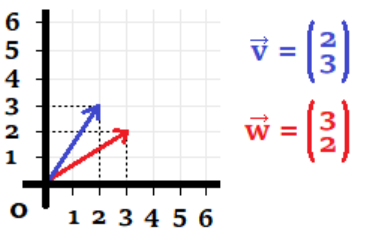

In de literatuur (zoals in het plaatje boven), worden vectoren vaak getekend als pijltjes - overeenkomstig met het perspectief dat een vector een lengte en een richting aangeeft. Dit perspectief is handig als we gaan nadenken over optellen en roteren. Meestal zien we deze vectoren als vastzittend aan de oorsprong (0,0). In beeldverwerking en vision echter, zien we vectoren vooral als punten (op een plaatje). In dat geval komt het punt overeen met het uiteinde van heet pijltje, als we het tekenen vanuit de oorsprong.  

De eenvoudigste manier om een plaatje te zien is een verzameling van punten - met lijnen en krommes ertussen - die een kleur moeten krijgen. Dit zijn de zogenaamde vector graphics: https://en.wikipedia.org/wiki/Vector_graphics. Laten we de kleuren nog even vergeten, en ervan uitgaan dat we dingen gaan tekenen op een lege achtergrond.

Zijn we er klaar voor? Laten we vectoren gaan tekenen door ze te plotten op een plaatje. We beginnen met alleen puntjes. 

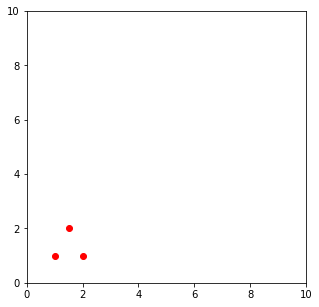

[array([1, 1]), array([2, 1]), array([1.5, 2. ])]

In [41]:
v1 = np.array([1,1]) #Voor vectoren gebruiken we numpy's array objecten. 
vlist = [v1, np.array([2,1]), np.array([1.5,2])] #laten we drie puntjes gebruiken
plotPointsOnly(vlist) #...en ze even laten zien:
vlist

We hebben nu drie puntjes. Laten we daar eens een beetje mee spelen. 

Ten eerste kunnen we de punten doen opschuiven. Dit heet transleren (translate). Dit doen we door een vector bij de punten op te tellen. Laten we daar even een functie voor maken: 

In [42]:
def translateAllBy(vlist, vec):
    return [v+vec for v in vlist]

### De code hierboven genereert een lijst. Dit is wat het doet: 
# vnew = []
# for v in vlist: 
#     vnew.append(v+vec)
# return vnew

Dus, wat doet deze functie? Het telt 1 vector (vec) op bij alle vectoren in de lijst (vlist) om een lijst van nieuwe vectoren te krijgen. Het optellen van twee vectoren werkt als in het plaatje hieronder, waar we twee vectoren ($\vec{v}$ en $\vec{w}$) optellen om een nieuwe vector $\vec{x}$ te krijgen: 

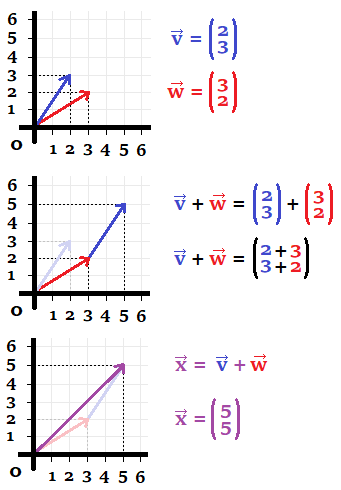

Twee vectoren optellen kan je je dus visueel voorstellen als het achter elkaar plakken van de twee vectorpijltjes. De functie $\tt translateAllBy$ telt dus hetzelfde pijltje op bij alle vectoren (punten) in de lijst, om een nieuwe lijst van vectoren (punten) te krijgen:

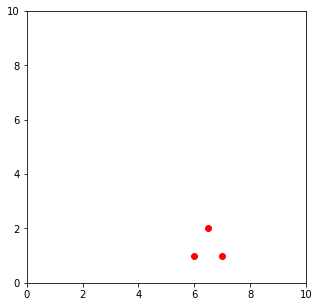

[array([6, 1]), array([7, 1]), array([6.5, 2. ])]

In [43]:
translatedPoints = translateAllBy(vlist,np.array([5,0]))
plotPointsOnly( translatedPoints )
#yay, nu hebben we opgeschoven puntjes:
translatedPoints

We kunnen ook vergroten/verkleinen, door alle vectoren in onze lijst met een constante te vermenigvuldigen:

In [44]:
def scaleAllBy(vlist, c):
    return [c*v for v in vlist]

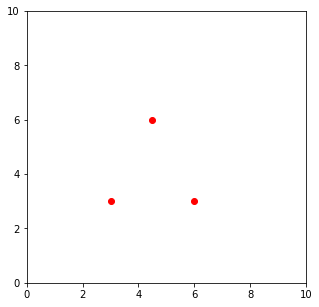

[array([3, 3]), array([6, 3]), array([4.5, 6. ])]

In [45]:
enlargedPoints = scaleAllBy(vlist,3)
plotPointsOnly( enlargedPoints )
#yay, nu hebben we een vergroting gedaan:
enlargedPoints

**Opgave 1** 

Zoals je misschien gemerkt hebt, is het eerste punt na opschaling (in de lijst 'vergroot') naar (3,3). Kun je ervoor zorgen met een combinatie van scaleAllBy en translateAllBy dat punten wel net zover uit elkaar komen als na de vergroting (dus een vergroting met een factor 3), maar dat door een translatie het eerste punt weer op (1,1) komt te staan? 

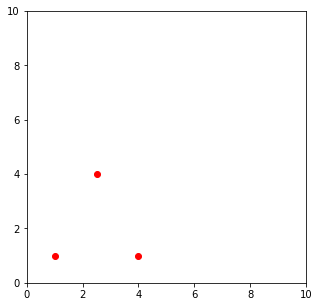

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

def plotPointsOnly(vlist):
    for v in vlist:
        plt.plot(v[0], v[1], 'ro')
    axes = plt.gca()
    axes.set_xlim([0,10])
    axes.set_ylim([0,10])
    fig = plt.gcf()
    fig.set_size_inches(5,5)
    plt.show()

def translateAllBy(vlist, vec):
    return [v+vec for v in vlist]

def scaleAllBy(vlist, c):
    return [c*v for v in vlist]

vlist = [ np.array([1,1]), np.array([2,1]), np.array([1.5,2])] #laten we drie puntjes gebruiken
vlist = scaleAllBy(vlist,3)
while(  np.array_equal(vlist[0], np.array([1,1])) != True  ):
    vlist = translateAllBy(vlist,np.array([-1,-1]))
plotPointsOnly(vlist)

In [47]:
De operaties "transleren" (translate, verplaatsen) en "schalen" (scale, vergroten) kunnen we doen door een resp. een andere vector op te tellen, of de hele vector te vermenigvuldigen met een constante. Echter, niet alle transformaties die we zouden willen doen met vectoren zijn te doen met puur vectoren en constantes. Bijvoorbeeld, als we een plaatje willen roteren, dan hebben we een complexere operatie nodig om uit te voeren op de vectoren. Hiervoor maken wij gebruik van matrices. (En specifiek, vierkante matrices.) 

Een matrix is niets meer dan een n (het aantal rijen) bij m (het aantal kolommen) array. Wij maken gebruik van vierkante matrices, dus wij zullen steeds n bij n matrices gebruiken:   

SyntaxError: invalid syntax (<ipython-input-47-6b717828b052>, line 1)

In [42]:
matrix1 = np.array([[1,0],[1,2]]) #dit is een 2 bij 2 matrix:
matrix1

array([[1, 0],
       [1, 2]])

Zoals je misschien al had opgemerkt, is een vector een 1 bij n, of een n bij 1 matrix. De wiskunde gaat standaard uit van n bij 1; dit heet een kolomvector. (Python ook, maar dat kan je niet zien in de python code of de output.) Een rij-vector kan ook, dat is dus een 1 bij n matrix. 

In [15]:
v1

array([1, 1])

Matrices worden op vectoren toegepast door ze ermee te vermenigvuldigen. Om te zien hoe dit werkt, laten we eerst kijken hoe we twee vectoren met elkaar kunnen vermenigvuldigen. Dit heet het dot product (of inproduct).  Om twee vectoren te vermenigvuldigen vermenigvuldigen de elementen die op dezelfde index staan met elkaar, en tellen alles bij elkaar op: dus 

(a, b) . (c, d) = a c + b d

De lengte van een vector kunnen we dus uitrekenen door een vector met zichzelf te vermenigvuldigen en dan de wortel te trekken:

sqrt( (a,b) . (a,b) ) = sqrt(a^2 + b^2)      #Overeenkomstig met de stelling van Pythagoras. 

Zo doen we dit in Python:

In [16]:
np.dot(np.array([2,3]), np.array([4,5]))  # 2*4 + 3*5 = 8 + 15 = 

23

Als we een n bij n matrix, M, met een vector van lengte n, v, vermenigvuldigen komt daar weer een vector van lengte n uit. Oftewel w = M v, is weer een vector van lengte n.

Dat zit zo, we kunnen de matrix zien als n rij-vectoren. Deze rijvectoren vermenigvuldigen we één voor één (dot-product), met de vector. Het eerste element van w krijgen we door de eerste rijvector van de matrix M te vermenigvuldigen met de vector v, het tweede door de tweede rijvector te vermenigvuldigen met de vector w, etc. 

Bijvoorbeeld: 

In [17]:
matrix1 #een 2 bij 2 matrix

NameError: name 'matrix1' is not defined

In [15]:
v1 # een vector van lengte 2

array([1, 1])

In [16]:
w = np.dot(matrix1, v1)
w # een vector van lengte 2

array([1, 3])

In [17]:
np.dot(matrix1[0], v1)  # (1,0) . (1,1)

1

In [18]:
np.dot(matrix1[1], v1) # (1,2) . (1,1)

3

Een voorbeeld van een bijzondere matrix is de zogenaamde identiteitsmatrix: een vierkante matrix (n bij n), die overal 0 is, behalve op de diagnonaal. Op de diagonaal (positie [1,1], [2,2], etc.) heeft het de waarde 1. De identiteitsmatrix van lengte n wordt meestal aangeduidt als I_n. Als je een identiteitsmatrix met een vector van de juiste lengte vermenigvuldigd, krijg je dezelfde vector weer terug: 

In [19]:
I2 = np.array([[1,0],[0,1]])
np.dot(I2, np.array([42,37]))

array([42, 37])

In [20]:
I3 = np.array([[1,0,0],[0,1,0],[0,0,1]])
np.dot(I3, np.array([9,1,1]))

array([9, 1, 1])

**Opgave 2**

Welke 2 bij 2 matrix zou je moeten gebruiken om een vector op te schalen met een factor 3? (Oftewel, hetzelfde te bereiken als te vermenigvuldigen met een constante c=3?) 

In [20]:
[x,y]
dus 2 bij 1
[3,0][0,3]

SyntaxError: invalid syntax (<ipython-input-20-19c99c388b29>, line 2)

Matrices kunnen worden gebruikt voor allerhande interessante operaties. Een leuke is bijvoorbeeld het roteren van het plaatje (ten opzichte van de oorsprong). Dit kan met een rotatiematrix: 

In [11]:
def rotationMatrix2D(angle):
    return np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle),np.cos(angle)]])

def applyTransformationToAll(matrix, vlist):
    return [np.dot(matrix,v) for v in vlist]

vlist2 = translatedPoints

In [12]:
rot = rotationMatrix2D(np.pi/16)
rot

array([[ 0.98078528, -0.19509032],
       [ 0.19509032,  0.98078528]])

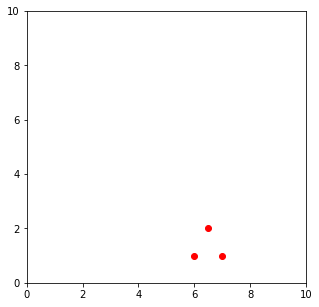

In [13]:
plotPointsOnly( vlist2 )

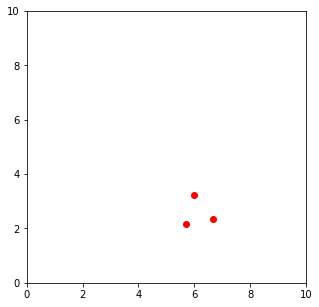

In [14]:
vlist3 = applyTransformationToAll(rot, vlist2) #laten we gaan draaien:
plotPointsOnly(vlist3)

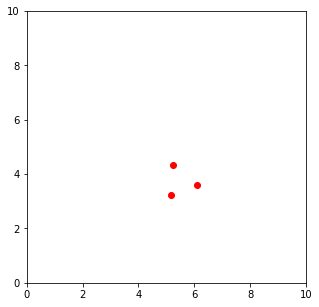

In [15]:
vlist4 = applyTransformationToAll(rot, vlist3) #en doordraaien
plotPointsOnly(vlist4)

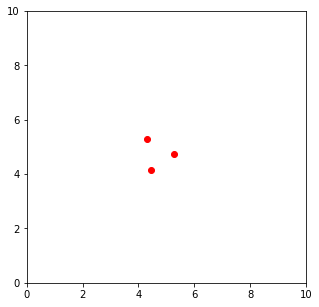

In [16]:
vlist4 = applyTransformationToAll(rot, vlist4) #verder doordraaien
plotPointsOnly(vlist4)

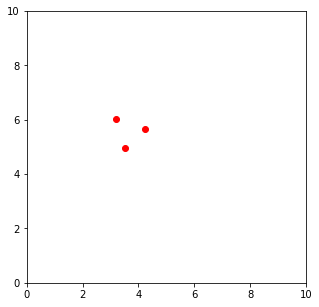

In [17]:
vlist4 = applyTransformationToAll(rot, vlist4) #en nog meer doordraaien...
plotPointsOnly(vlist4)

Nu hebben we vier keer de rotatiematrix toegepast. Kortom, we hebben vier keer een hoek van pi/16 (ten opzichte van de oorsprong) -- dat is een hoek van pi/4 (45 graden) in totaal -- gedraaid. 

Een van de leuke eigenschappen van matrices, is dat je -- als je maar precies weet welke transformaties je in volgorde wil doen -- van een hele serie matrixtransformaties één matrix kan bouwen. Dit doe je simpelweg door deze matrices te vermenigvuldigen. 
Dus als we onze rotatiematrix R noemen, dan is
(R(Rv)), gelijk aan (R.R) v

Dit betekent dat we als we een serie transformaties willen toepassen, we netjes alle matrices kunnen vermenigvuldigen, en vervolgens maar één matrix op de vectoren hoeven loslaten. Dat is dus lekker efficiënt. 

Bijvoorbeeld: vier keer roteren:

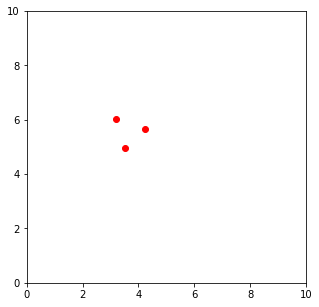

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [18]:
rot4 = np.dot(rot, np.dot(rot, np.dot(rot,rot)))
plotPointsOnly(applyTransformationToAll(rot4, vlist2)) #dit is hetzelfde resultaat als vier keer los de rotatie toepassen.
rot4

Maar hoe werkt matrixvermenigvuldiging eigenlijk? 

We weten al hoe je een matrix met een vector vermenigvuldigd: de eerste rij van de matrix, maal de vector, dan de tweede rij van de matrix maal de vector. In een 2D probleem: L v = (rij1vanL maal v, rij2vanL maal v) 

Matrixvermenigvuldiging is het makkelijkste te zien als de linker matrix, L, in de vermenigvuldiging L.R te zien als een lijstje rij-vectoren. En R te zien als een lijstje kolomvectoren:
L.R = [ [ rij1vanL maal kolom1vanR , rij1vanL maal kolom2vanR], [ rij2vanL maal kolom1vanR , rij2vanL maal kolom2vanR] ]

Of als L = [[1,2],[3,4]] en R = [[a,b],[c,d]], dan:

L.R = [[a+2c, b+2d], [3a+4c, 3b+4d]]

In [ ]:
**Opgave 3**

Maak twee transformatie-matrices (gebruik makend van de functies hierboven en de voorgaande antwoorden:
1) een rotatiematrix, R3, voor een rotatie van pi/6 (30 graden)
2) een matrix om een vector 2 keer uit te rekken in het x-coordinaat (het eerste element), maar het y-coordinaat met rust laat, M21

Controleer met minstens 2 verschillende vectoren (zelf te verzinnen) dat het niet uitmaakt of je eerst R3.v = w, en dan M21.w = z uitrekent, of eerst R3.M12 = MX, en dan MX.v=z uitrekent. 

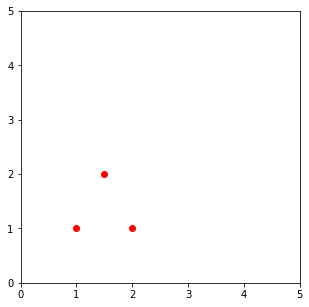

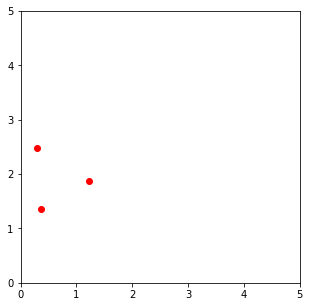

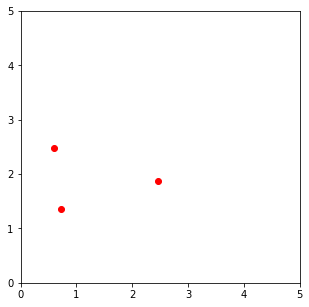

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

def plotPointsOnly(vlist):
    for v in vlist:
        plt.plot(v[0], v[1], 'ro')
    axes = plt.gca()
    axes.set_xlim([0,5])
    axes.set_ylim([0,5])
    fig = plt.gcf()
    fig.set_size_inches(5,5)
    plt.show()


def rotationMatrix2D(angle):
    return np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle),np.cos(angle)]])

def applyTransformationToAll(matrix, vlist):
    return [np.dot(matrix,v) for v in vlist]


R3= rotationMatrix2D(np.pi/6) #45 graden
stap2 = np.array([[2,0],[0,1]])

vlist = [ np.array([1,1]), np.array([2,1]), np.array([1.5,2])] #laten we drie puntjes gebruiken
plotPointsOnly(vlist)
vlist = applyTransformationToAll(R3, vlist)
plotPointsOnly(vlist)
vlist = applyTransformationToAll(stap2, vlist)
plotPointsOnly(vlist)

Er zijn aardig wat bewerkingen mogelijk met 2 bij 2 matrices en vectoren van 2 lang. Echter, niet helemaal alles. Zo hebben we gezien dat we vectoren kunnen transleren (opschuiven) door het optellen van een andere vector. Maar dit kunnen we niet met een twee bij twee matrix. Daarom kiezen we er vaak voor om vectoren uit te drukken in zogenaamde "homogene coördinaten". 

Laten we er eerlijk over zijn, homogene coördinaten zijn een beetje een hack [dwz, er is ook wel een officiële verklaring/lezing voor de die-hards: https://www.tomdalling.com/blog/modern-opengl/explaining-homogenous-coordinates-and-projective-geometry/, maar het is niet belangrijk om dat te doorgronden.]. Het zit zo: 
- We voegen een extra element toe aan de vector. Dus een vector van 2 wordt 3 lang. 
- Dit laatste element is altijd 1. 

Dus (2,3) wordt (2,3,1), en (0,0) wordt (0,0,1).

Als we dit afspreken kunnen we dus 3 bij 3 matrices gebruiken voor transformaties. Dit geeft ons een stuk meer flexibiliteit. Zo kunnen we met homogene coördinaten wel translaties uitdrukken in een matrix. 

Maar laten we eerst even wat functietjes definiëren om vectoren om te zetten in homogene coordinaten. NB: om homogene coordinaten te kunnen plotten, hoeven we de eerdere code (PlotPointsOnly) niet aan te passen omdat we gewoon de eerste twee elementen gebruiken om te plotten.

In [19]:
def makeMeHomogenous(vec):
    return np.array([vec[0],vec[1],1])

def makeUsHomogenous(vlist):
    result = []
    for v in vlist:
        result.append(makeMeHomogenous(v))
    return result

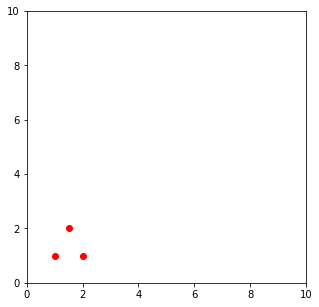

[array([1, 1, 1]), array([2, 1, 1]), array([1.5, 2. , 1. ])]

In [22]:
hvList = makeUsHomogenous(vlist)
plotPointsOnly(hvList)
hvList

Okej, nu we alles in homogene coordinaten hebben, laten we eens een translatie doen met een drie bij drie matrix:

In [26]:
T33= np.array([[1,0,3],[0,1,3],[0,0,1]])
T33

array([[1, 0, 3],
       [0, 1, 3],
       [0, 0, 1]])

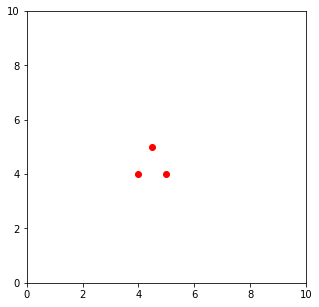

[array([4, 4, 1]), array([5, 4, 1]), array([4.5, 5. , 1. ])]

In [27]:
hv2 = applyTransformationToAll(T33, hvList)
plotPointsOnly(hv2)
hv2

In het algemeen kunnen we een translatie met een 2D-vector doen door zo'n transformatiematrix:

In [28]:
def translationMatrix(v):
    return np.array([[1.0,0.0,v[0]],[0.0,1.0,v[1]],[0.0,0.0,1.0]])

translationMatrix([3,3])

array([[1., 0., 3.],
       [0., 1., 3.],
       [0., 0., 1.]])

Maar waarom is het eigenlijk belangrijk om transformaties te kunnen doen met matrices? 
De crux zit hem in het feit dat we door matrices te vermenigvuldigen complexere operaties kunnen bouwen. 
Bijvoorbeeld, we hebben gezien hoe we een plaatje kunnen roteren ten opzichte van de oorsprong (dwz, het punt (0,0) ). 

Maar wat als we nu het driehoekje (de drie puntjes), niet om de oorsprong willen laten draaien, maar om het middelpunt van het driehoekje zelf. Hoe pakken we dat aan? 
Nou, wat we kunnen doen is:
1) het middelpunt van het driehoekje naar het punt (0,0) verplaatsen
2) dan het plaatje draaien
3) en dan het het driehoekje weer terugplaaten rond het middelpunt (waar het eerst stond)
Dit kunnen we met 3 matrices doen: laten we ze stap1, stap2, en stap3 noemen. De uiteindelijke operatie wordt dan:

stap3 (stap2 (stap1 v))... of natuurlijk (stap1.stap2.stap3) v

In [10]:
#Eerst even een functie bouwen waar we überhaupt het midden mee kunnen uitrekenen: 
def computeCentre(vlist):
    result = np.array([0.0,0.0,0.0]) #oh ja, even floatjes gebruiken inplaats van integers (typecasting, meh, details)
    for v in vlist: 
        result += v
    result /= len(vlist)
    return result

def plotOnlyPointsAndMiddle(vlist,middle):
    for v in vlist:
        plt.plot(v[0], v[1], 'ro')
    plt.plot(middle[0], middle[1], 'ro', color='b')
    axes = plt.gca()
    axes.set_xlim([0,10])
    axes.set_ylim([0,10])
    fig = plt.gcf()
    fig.set_size_inches(5,5)
    plt.show()

computeCentre(hv2)

NameError: name 'hv2' is not defined

In [30]:
#dan kunnen we de stap1 matrix bouwen:
mp = computeCentre(hv2)
stap1 = translationMatrix(-mp)
#maar ook gelijk de stap3 matrix:
stap3 = translationMatrix(mp)

In [31]:
#voor stap2 moeten we eerst de rotatiematrix even in homogene coordinaten krijgen: 
def rotationMatrix(angle):
    return np.array([[np.cos(angle), -np.sin(angle),0],[np.sin(angle),np.cos(angle),0],[0,0,1]])

stap2 = rotationMatrix(np.pi/4) #45 graden

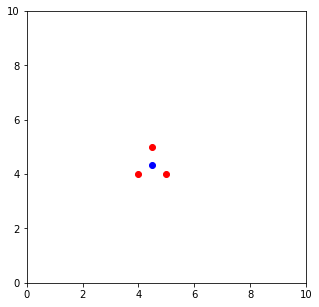

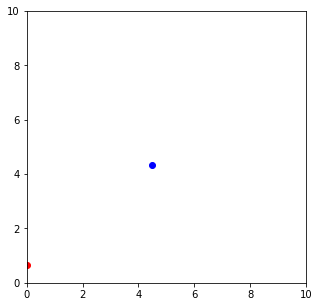

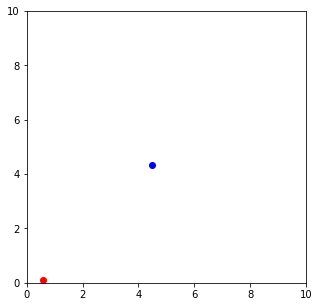

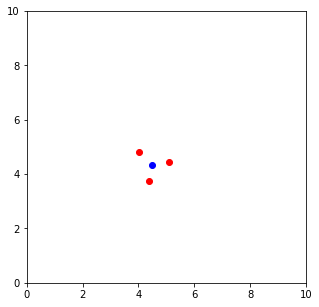

[array([4.38214887, 3.74407768, 1.        ]),
 array([5.08925565, 4.45118446, 1.        ]),
 array([4.02859548, 4.80473785, 1.        ])]

In [32]:
#En dan uiteraard de hele boel nog even uitvoeren: 
plotOnlyPointsAndMiddle(hv2,mp)
hv2s1 = applyTransformationToAll(stap1, hv2)
plotOnlyPointsAndMiddle(hv2s1,mp)
hv2s2 = applyTransformationToAll(stap2, hv2s1)
plotOnlyPointsAndMiddle(hv2s2,mp)
hv2s3 = applyTransformationToAll(stap3, hv2s2)
plotOnlyPointsAndMiddle(hv2s3,mp)
hv2s3

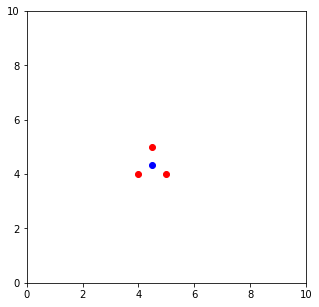

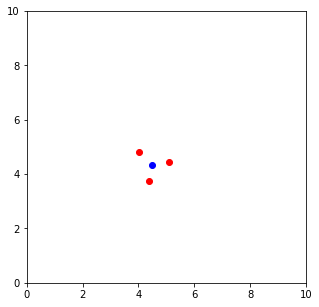

In [33]:
##of het kan uiteraard in 1 keer:
theEntireTransformation = np.dot(stap3, np.dot(stap2,stap1))
plotOnlyPointsAndMiddle(hv2,mp)
hv2yay = applyTransformationToAll(theEntireTransformation, hv2)
plotOnlyPointsAndMiddle(hv2yay,mp)

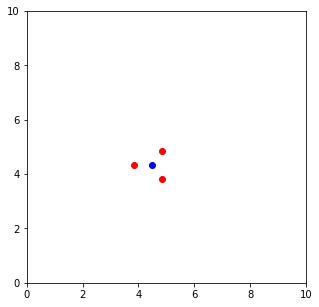

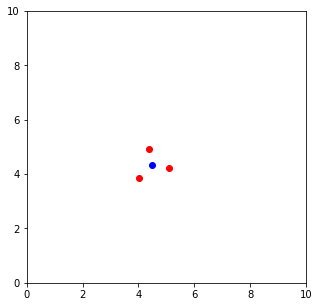

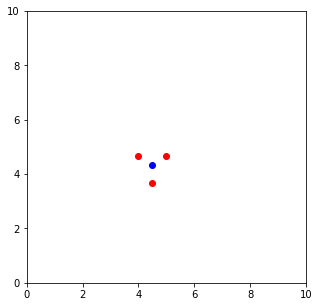

In [34]:
##en nog een keer:
hv2yay = applyTransformationToAll(theEntireTransformation, hv2yay)
plotOnlyPointsAndMiddle(hv2yay,mp)
##en nog een keer!!!
hv2yay = applyTransformationToAll(theEntireTransformation, hv2yay)
plotOnlyPointsAndMiddle(hv2yay,mp)
##en nog een keer!!!!!!!
hv2yay = applyTransformationToAll(theEntireTransformation, hv2yay)
plotOnlyPointsAndMiddle(hv2yay,mp)

**Laatste opgave**

Nu weet je hoe je transformaties kan doen met matrices. Laten we eens een beetje spelen. Deze opgave is vooral om een beetje gevoel te krijgen voor de operaties, je mag jezelf helemaal uitleven en het heel fancy maken, maar je mag het ook heel beperkt houden. 

a) teken eens een smiley 

- de simpele optie: maak een list van vectoren (puntjes) die op een smiley lijken en plot het met plotPointsOnly
- de leukere optie: zoek uit hoe je met mathplotlib lijntjes en open rondjes maakt, en maak een nieuwe functie (bijvoorbeeld door stukken code van plotPointsOnly en/of plotOnlyPointsAndMiddle te hergebruiken) die met één of meer lijsten van vectoren  een fancy smiley tekent

b) zet de smiley van a) door middel van een matrixtransformatie eens op zijn kop. 

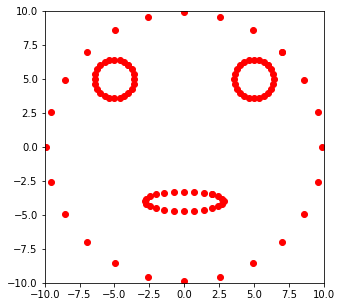

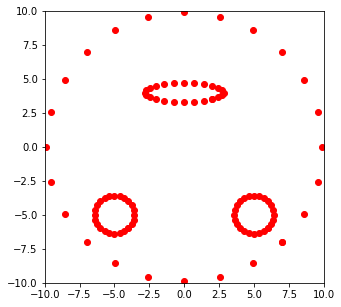

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

def plotPointsOnly(vlist):
    for v in vlist:
        plt.plot(v[0], v[1], 'ro')
    axes = plt.gca()
    axes.set_xlim([-10,10])
    axes.set_ylim([-10,10])
    fig = plt.gcf()
    fig.set_size_inches(5,5)
    plt.show()

def translateAllBy(vlist, vec):
    return [v+vec for v in vlist]

def scaleAllBy(vlist, c):
    return [c*v for v in vlist]

def rotationMatrix2D(angle):
    return np.array([[np.cos(angle), -np.sin(angle)],[np.sin(angle),np.cos(angle)]])

def applyTransformationToAll(vlist, matrix):
    return [np.dot(matrix,v) for v in vlist]

def createCircle():
    R3= rotationMatrix2D(np.pi/12)
    newPoint = [ np.array(  [1,1])]
    returnList = newPoint
    for i in range(24):
        newPoint = applyTransformationToAll(newPoint, R3)
        returnList += newPoint
    return returnList





vlist = createCircle()
vec = np.array([5, 5])
eyeleft = translateAllBy(vlist, vec)
vec = np.array([-5, 5])
eyeRight = translateAllBy(vlist, vec)
vec = np.array([[7, 0], [0,7]])
head =  applyTransformationToAll(vlist, vec)
vec = np.array([[2, 0], [0, 0.5]])
mouth = applyTransformationToAll(vlist, vec)
vec = np.array([0, -4])
mouth = translateAllBy(mouth, vec)


vlist= head + eyeleft + eyeRight + mouth
plotPointsOnly(vlist)
vec = np.array([1,-1])
vlist = scaleAllBy(vlist, vec)
plotPointsOnly(vlist)

Je bent nu klaar met de tutorial. Kijk je ook nog even de filmpjes?

Als de auteur van deze tutorial (Diederik M. Yamamoto-Roijers), wil ik graag Roxanne van der Pol en Florian Humblot bedanken voor hun nuttige feedback op deze tutorial, en Roxanne voor het maken van de plaatjes. -- DMYR 1/2/2020 